Import knihoven


In [256]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [257]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [258]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [259]:
searched_object = 'pottedplant' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

58


nacte a zobrazy zvoleny obrazek

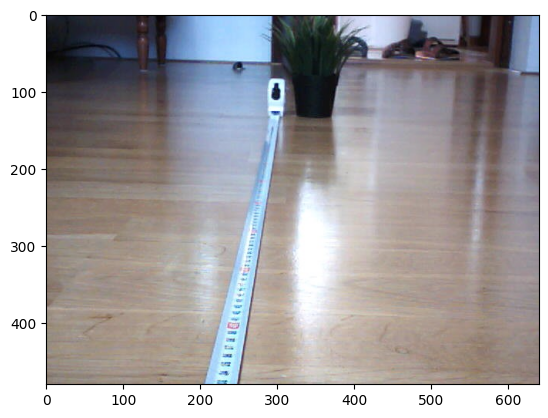

In [260]:
img = cv2.imread('140.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [261]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [262]:
results = model(img)#applies model on the image 



0: 480x640 1 potted plant, 118.7ms
Speed: 2.5ms preprocess, 118.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [263]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa

pottedplant
58
X= 289 Y= 0 W= 422 H= 135
center: 355 67
confidence: 88
345


array([[[ 71,  53,  42],
        [ 70,  52,  41],
        [ 70,  52,  41],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[ 68,  50,  39],
        [ 68,  50,  39],
        [ 68,  50,  39],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[ 65,  48,  39],
        [ 64,  47,  38],
        [ 64,  47,  38],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[119, 131, 143],
        [118, 130, 142],
        [118, 130, 142],
        ...,
        [129, 131, 149],
        [130, 130, 148],
        [131, 129, 148]],

       [[119, 130, 144],
        [119, 130, 144],
        [118, 129, 143],
        ...,
        [126, 128, 146],
        [127, 127, 145],
        [126, 126, 144]],

       [[114, 125, 139],
        [115, 126, 140],
        [115, 126, 140],
        ...,
        [122, 126, 144],
        [125, 125, 143],
        [124, 124, 142]]

vypise id nalezenych objektu 

In [264]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[58]
[(355, 67)]
[135]


hledani urciteho objektu

In [265]:
a = objects_ids.index(58)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 
h = objects_heights[a]
print(h)
d=distances[a]
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) 
print(d)





0
355 67
deviation =  -35
135
345


ukaze obrazek

tensor([[2.8939e+02, 1.8307e-01, 4.2237e+02, 1.3554e+02, 8.8308e-01, 5.8000e+01]])


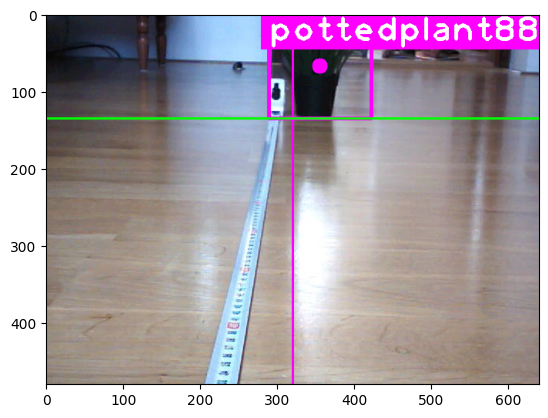

In [266]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
